# ***Customer Segmentation Using KMeans***

### **Problem Statement**

Create a k-means clustering algorithm to group customers of a retail store
based on their purchase history.

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

---



**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")





**Data Exploration**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


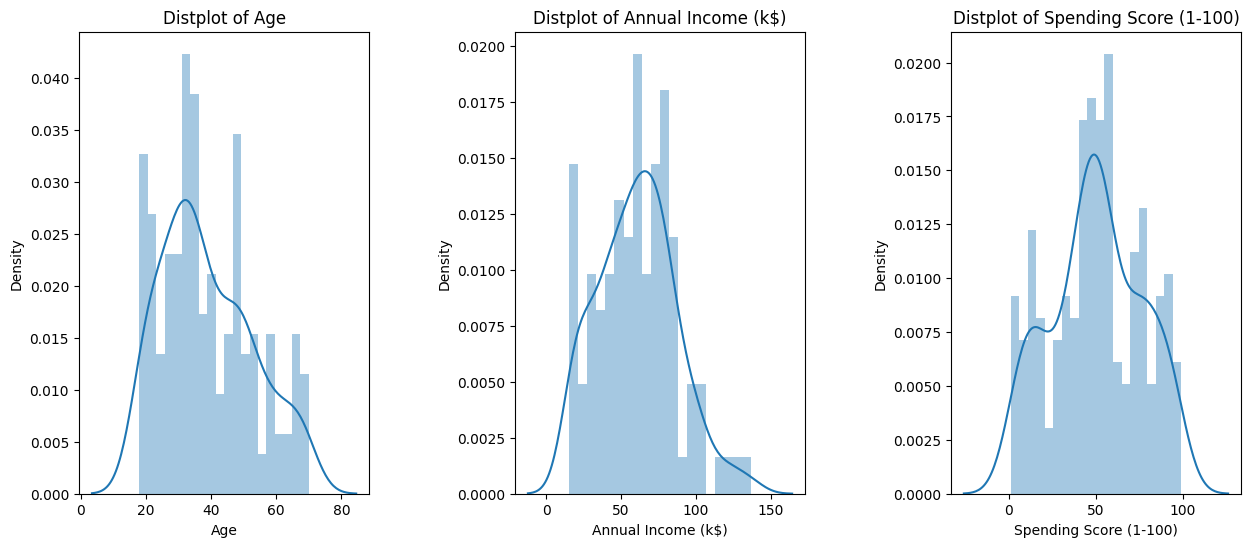

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for i in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[i] , bins = 20)
    plt.title('Distplot of {}'.format(i))
plt.show()

**Count Plot Of Gender**

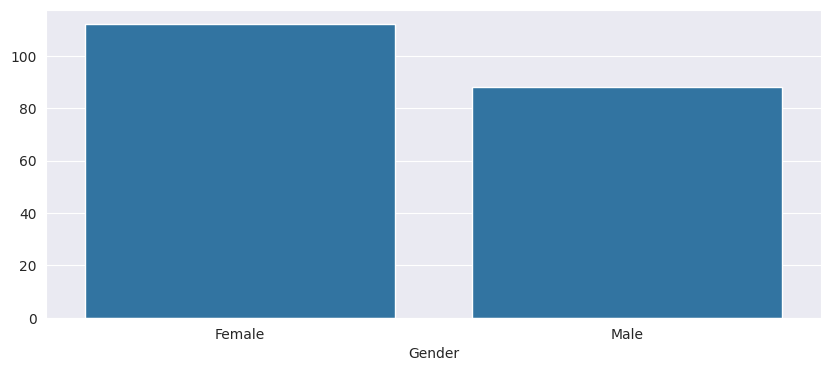

In [9]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

**Plotting the Relationship between Age, Annual Income, Spending Score**

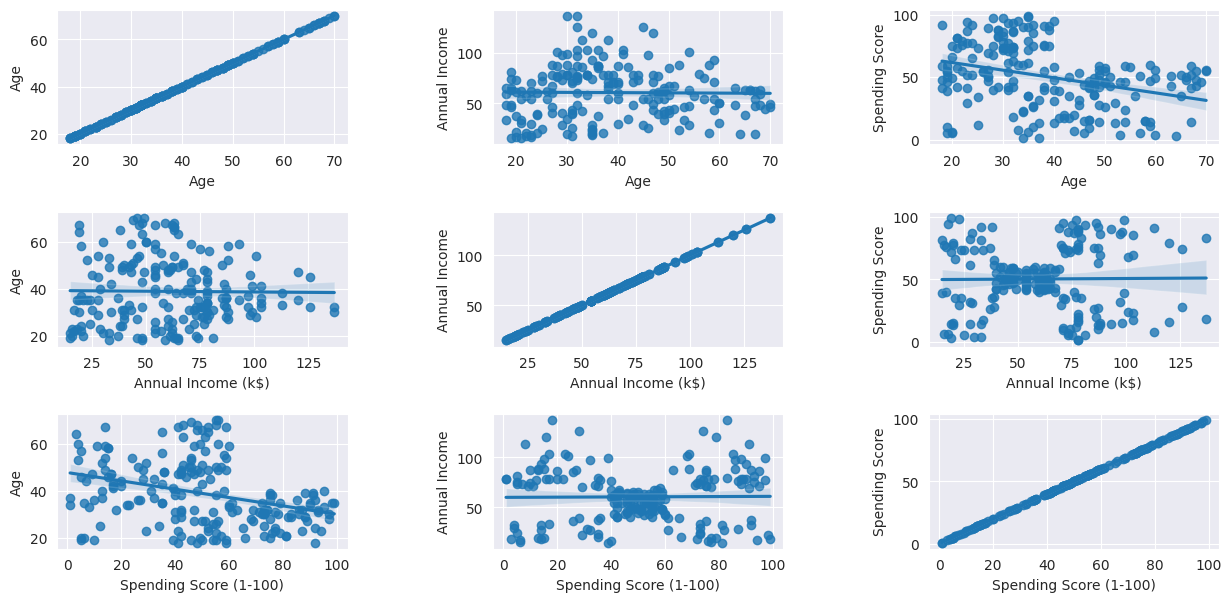

In [10]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

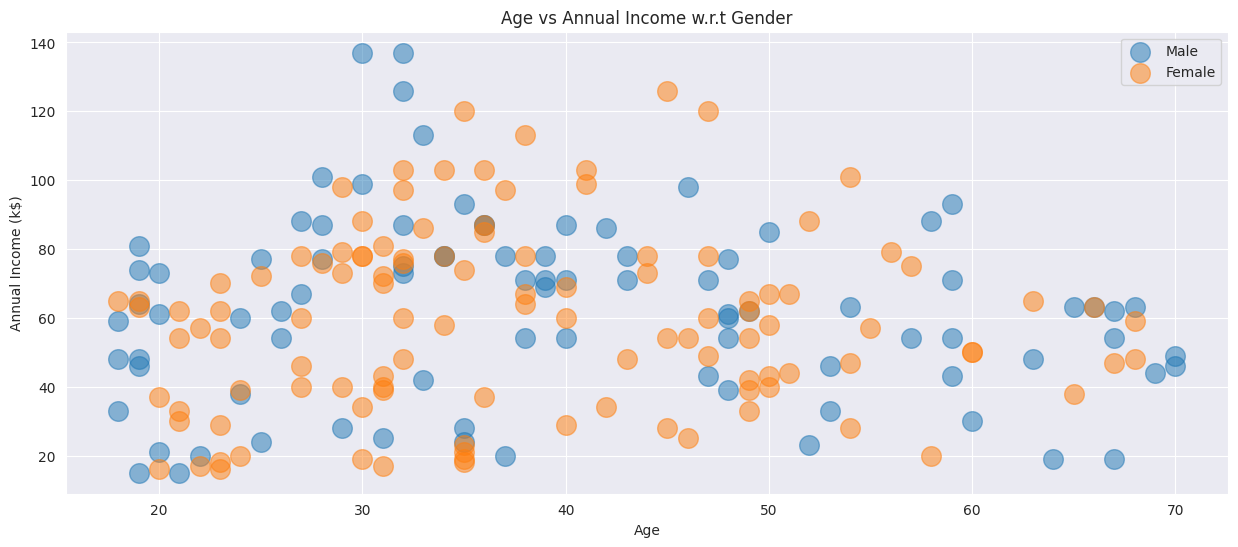

In [11]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

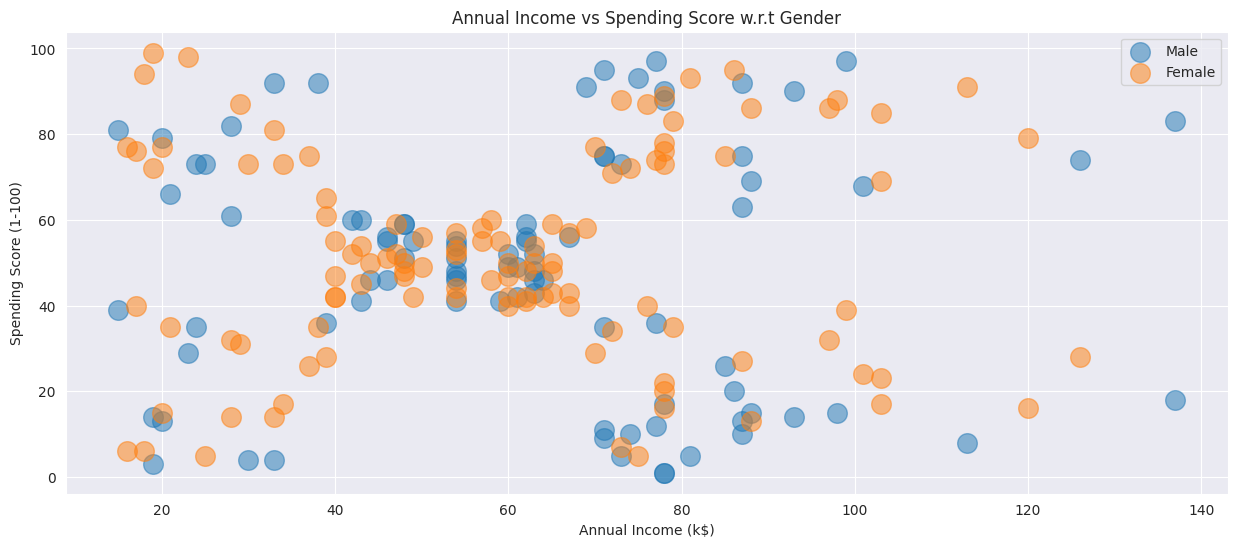

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Distribution of values in Age, Annual Income, Spending Score according to Gender**

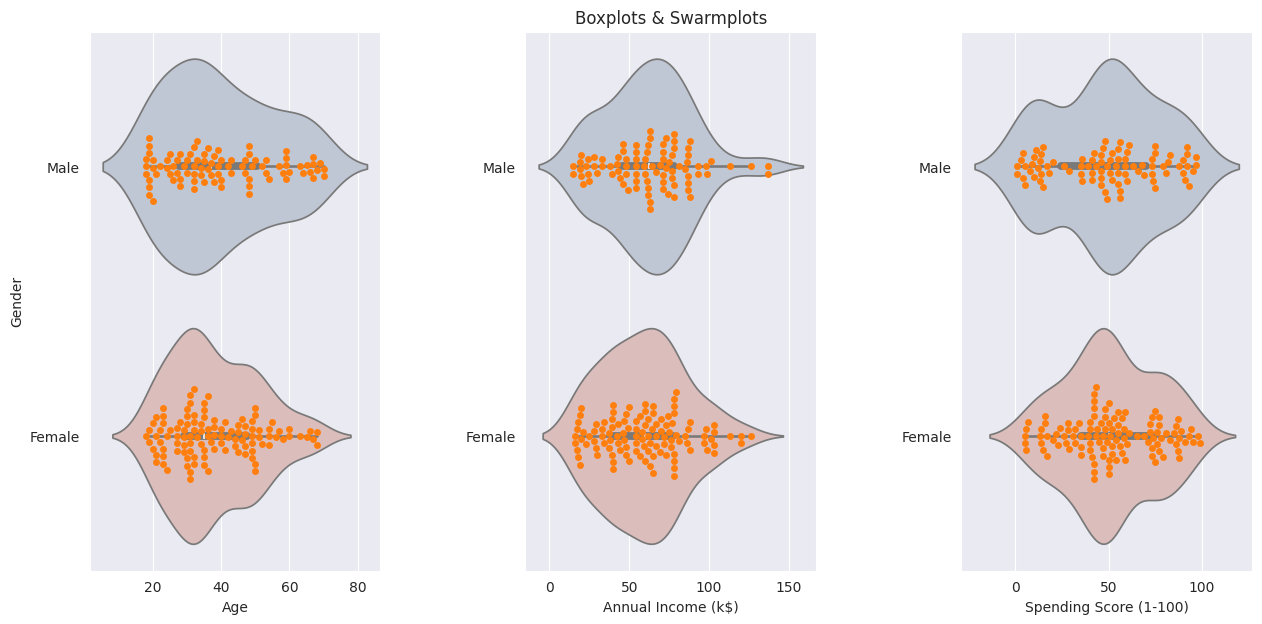

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else ' ')
plt.show()

In [14]:
# Selecting 'Annual Income (k$)' and 'Spending Score'
X = df.iloc[:, [3, 4]].values  # Assuming 3rd and 4th columns are 'Annual Income (k$)' and 'Spending Score'


**Building the Model**

In [15]:
# Find optimal number of clusters using the elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

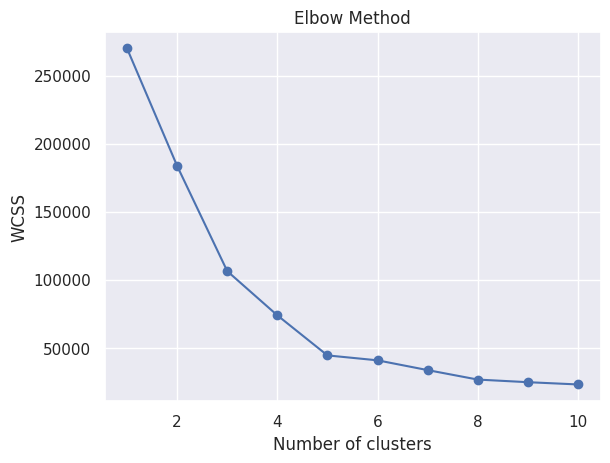

In [16]:
# Plot the elbow method graph
sns.set()
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

**Optimum Number Of Clusters = 5**

Training the k-means Clustering Model

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)

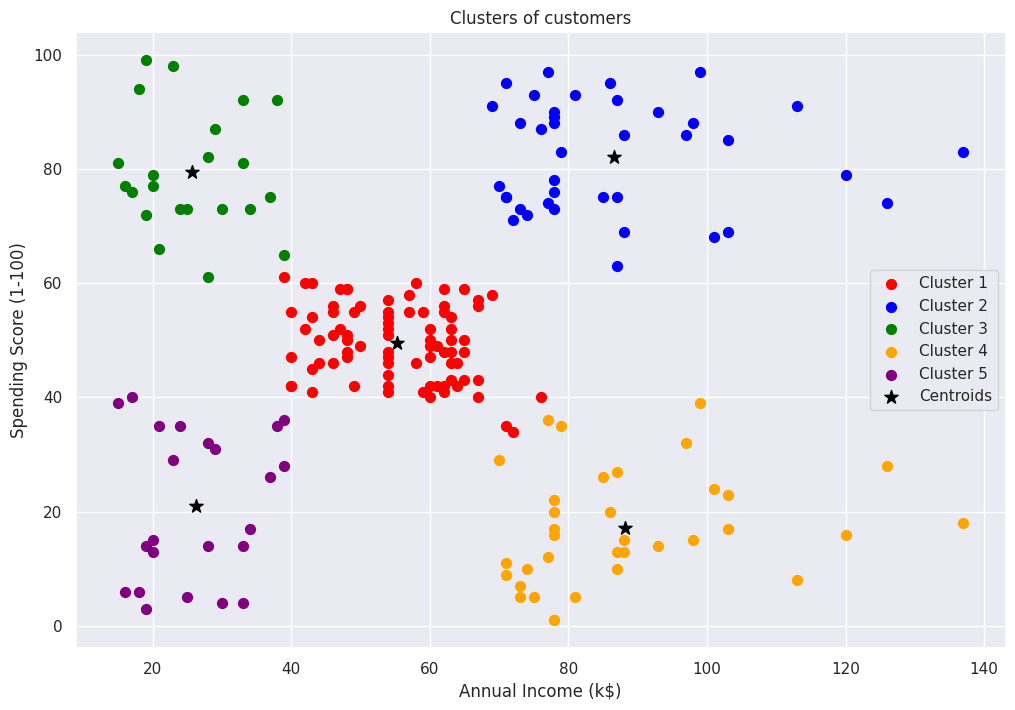

In [18]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='orange', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='purple', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker= '*', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()